In [34]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import calendar
from sklearn.compose import make_column_selector
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('file.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [36]:
df.duplicated().sum()

0

In [37]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Values': missing_data, 
    'Percentage': missing_percentage
    }).query("`Missing Values` > 0")

missing_table

,Missing Values,Percentage
CustomerID,31,0.058540
Gender,31,0.058540
Location,31,0.058540
Tenure_Months,31,0.058540
Transaction_ID,31,0.058540
Transaction_Date,31,0.058540
Product_SKU,31,0.058540
Product_Description,31,0.058540
Quantity,31,0.058540
Avg_Price,31,0.058540


In [38]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)
df.drop('Transaction_ID',axis=1,inplace=True)
# df['Customer_Age'] = np.random.randint(18, 65, df.shape[0])

In [39]:
df.isnull().sum()

CustomerID             0
Gender                 0
Tenure_Months          0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [40]:
cusID = df['CustomerID'].unique()
age = np.random.randint(18, 65, len(cusID))
df['Customer_Age'] = df['CustomerID'].map(dict(zip(cusID, age)))

In [41]:
city_state_region_pairs = [
    ("New York", "New York", "East"), ("Los Angeles", "California", "West"), 
    ("Chicago", "Illinois", "Central"), ("Houston", "Texas", "South"), 
    ("Phoenix", "Arizona", "West"), ("Philadelphia", "Pennsylvania", "East"), 
    ("San Antonio", "Texas", "South"), ("San Diego", "California", "West"), 
    ("Dallas", "Texas", "South"), ("San Jose", "California", "West"),
    ("Austin", "Texas", "South"), ("Jacksonville", "Florida", "South"), 
    ("Fort Worth", "Texas", "South"), ("Columbus", "Ohio", "Central"), 
    ("Charlotte", "North Carolina", "South"), ("San Francisco", "California", "West"), 
    ("Indianapolis", "Indiana", "Central"), ("Seattle", "Washington", "West"), 
    ("Denver", "Colorado", "West"), ("Washington", "D.C.", "East"), 
    ("Nashville", "Tennessee", "South"), ("El Paso", "Texas", "South"), 
    ("Detroit", "Michigan", "Central"), ("Boston", "Massachusetts", "East"), 
    ("Memphis", "Tennessee", "South"), ("Portland", "Oregon", "West"), 
    ("Las Vegas", "Nevada", "West"), ("Louisville", "Kentucky", "South"), 
    ("Baltimore", "Maryland", "East"), ("Milwaukee", "Wisconsin", "Central"), 
    ("Albuquerque", "New Mexico", "West"), ("Tucson", "Arizona", "West"), 
    ("Fresno", "California", "West"), ("Sacramento", "California", "West"), 
    ("Long Beach", "California", "West"), ("Kansas City", "Missouri", "Central"), 
    ("Mesa", "Arizona", "West"), ("Virginia Beach", "Virginia", "South"), 
    ("Atlanta", "Georgia", "South"), ("Colorado Springs", "Colorado", "West"), 
    ("Omaha", "Nebraska", "Central"), ("Raleigh", "North Carolina", "South"), 
    ("Miami", "Florida", "South"), ("Cleveland", "Ohio", "Central"), 
    ("Tulsa", "Oklahoma", "South"), ("Oakland", "California", "West"), 
    ("Minneapolis", "Minnesota", "Central"), ("Wichita", "Kansas", "Central"), 
    ("Arlington", "Texas", "South"), ("New Orleans", "Louisiana", "South"), 
    ("Bakersfield", "California", "West"), ("Tampa", "Florida", "South"), 
    ("Honolulu", "Hawaii", "West"), ("Anaheim", "California", "West"), 
    ("Aurora", "Colorado", "West"), ("Santa Ana", "California", "West"), 
    ("St. Louis", "Missouri", "Central"), ("Riverside", "California", "West"), 
    ("Corpus Christi", "Texas", "South"), ("Pittsburgh", "Pennsylvania", "East"), 
    ("Lexington", "Kentucky", "South"), ("Anchorage", "Alaska", "West"), 
    ("Stockton", "California", "West"), ("Cincinnati", "Ohio", "Central"), 
    ("St. Paul", "Minnesota", "Central"), ("Greensboro", "North Carolina", "South"), 
    ("Buffalo", "New York", "East"), ("Plano", "Texas", "South"), 
    ("Newark", "New Jersey", "East"), ("Henderson", "Nevada", "West"), 
    ("Chula Vista", "California", "West"), ("Orlando", "Florida", "South"), 
    ("Irvine", "California", "West"), ("Toledo", "Ohio", "Central"), 
    ("Durham", "North Carolina", "South"), ("Fort Wayne", "Indiana", "Central"), 
    ("St. Petersburg", "Florida", "South"), ("Laredo", "Texas", "South"), 
    ("Chandler", "Arizona", "West"), ("Norfolk", "Virginia", "South"), 
    ("Winston-Salem", "North Carolina", "South"), ("Glendale", "Arizona", "West"), 
    ("Reno", "Nevada", "West"), ("Chesapeake", "Virginia", "South"), 
    ("Gilbert", "Arizona", "West"), ("Baton Rouge", "Louisiana", "South"), 
    ("Irving", "Texas", "South"), ("Hialeah", "Florida", "South"), 
    ("Richmond", "Virginia", "South"), ("Boise", "Idaho", "West"), 
    ("Spokane", "Washington", "West"), ("Des Moines", "Iowa", "Central"), 
    ("Modesto", "California", "West"), ("Fayetteville", "North Carolina", "South"), 
    ("Tacoma", "Washington", "West"), ("Oxnard", "California", "West"), 
    ("Fontana", "California", "West"), ("Mobile", "Alabama", "South"), 
    ("Moreno Valley", "California", "West"), ("Little Rock", "Arkansas", "South"), 
    ("Cape Coral", "Florida", "South"), ("Grand Rapids", "Michigan", "Central"), 
    ("Salt Lake City", "Utah", "West"), ("Amarillo", "Texas", "South"), 
    ("Huntsville", "Alabama", "South")
]

In [42]:
cities, states, regions = zip(*city_state_region_pairs)
df['City'] = np.random.choice(cities, len(df))
df['State'] = [states[cities.index(city)] for city in df['City']]
df['Region'] = [regions[cities.index(city)] for city in df['City']]

df['Total_Prices'] = df['Avg_Price'] * df['Quantity'] + df.Delivery_Charges
df['Total_Spend'] = df['Online_Spend'] + df['Offline_Spend']

In [43]:
df.head()

,CustomerID,Gender,Tenure_Months,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,...,Online_Spend,Month,Coupon_Code,Discount_pct,Customer_Age,City,State,Region,Total_Prices,Total_Spend
0,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Corpus Christi,Texas,South,160.21,6924.5
1,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Arlington,Texas,South,160.21,6924.5
2,17850.0,M,12.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,...,2424.5,1,ELEC10,10.0,54,Plano,Texas,South,252.04,6924.5
3,17850.0,M,12.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,...,2424.5,1,ELEC10,10.0,54,Irvine,California,West,88.00,6924.5
4,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Buffalo,New York,East,160.21,6924.5


In [44]:
df.to_csv('file_temp.csv', index=False)

In [45]:
new_df = pd.concat([df]*1,ignore_index=True)

In [46]:
max_cusID = df['CustomerID'].max().astype(int)
new_df['CustomerID'] = range(max_cusID+1, max_cusID+1+len(new_df))

In [47]:
new_df.head()

,CustomerID,Gender,Tenure_Months,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,...,Online_Spend,Month,Coupon_Code,Discount_pct,Customer_Age,City,State,Region,Total_Prices,Total_Spend
0,18284,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Corpus Christi,Texas,South,160.21,6924.5
1,18285,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Arlington,Texas,South,160.21,6924.5
2,18286,M,12.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,...,2424.5,1,ELEC10,10.0,54,Plano,Texas,South,252.04,6924.5
3,18287,M,12.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,...,2424.5,1,ELEC10,10.0,54,Irvine,California,West,88.00,6924.5
4,18288,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Buffalo,New York,East,160.21,6924.5


In [48]:
product_age = pd.read_csv('product_age.csv', encoding='utf-8')
product_age.head()

,Product Description,18,19,20,21,22,23,24,25,26,...,55,56,57,58,59,60,61,62,63,64
0,1 oz Hand Sanitizer,5,1,2,5,2,3,2,4,5,...,4,1,4,1,3,5,2,3,3,1
1,7&quot; Dog Frisbee,9,0,5,0,0,2,5,9,0,...,2,1,9,0,2,1,9,7,4,3
2,8 pc Android Sticker Sheet,12,4,3,7,4,8,10,13,2,...,6,2,7,1,2,9,5,9,6,3
3,20 oz Stainless Steel Insulated Tumbler,2,2,1,1,0,4,6,4,2,...,4,0,1,0,0,4,4,3,1,1
4,22 oz Android Bottle,3,3,4,7,0,3,4,3,4,...,3,0,6,2,3,5,0,1,0,1


In [49]:
product_age = product_age.melt(id_vars=['Product Description'], var_name='Customer_Age', value_name='Count_of_Item_Purchased')

In [50]:
product_age

,Product Description,Customer_Age,Count_of_Item_Purchased
0,1 oz Hand Sanitizer,18,5
1,7&quot; Dog Frisbee,18,9
2,8 pc Android Sticker Sheet,18,12
3,20 oz Stainless Steel Insulated Tumbler,18,2
4,22 oz Android Bottle,18,3
...,...,...,...
18560,YouTube Women's Short Sleeve Tri-blend Badge T...,64,0
18561,YouTube Women's Short Sleeve Tri-blend Badge T...,64,0
18562,YouTube Womens 3/4 Sleeve Baseball Raglan Whit...,64,0
18563,YouTube Wool Heather Cap Heather/Black,64,0


In [51]:
for x in product_age['Customer_Age'].unique():
    filter_item = product_age[product_age['Customer_Age']==x]
    if not filter_item.empty:
        items = filter_item['Product Description'].to_list()
        counts = filter_item['Count_of_Item_Purchased'].to_list()
        weighted_item = np.repeat(items, counts)
        new_df.loc[new_df['Customer_Age']==x, 'Product_Description'] = np.random.choice(weighted_item, size= new_df[new_df['Customer_Age']==x].shape[0])

In [52]:
category_to_sku = df.groupby('Product_Description').apply(
    lambda x: {
        'SKU': x['Product_SKU'].unique().tolist()[0],
        'Category': x['Product_Category'].unique().tolist()[0],
        'Avg_Price': x['Avg_Price'].unique().tolist()[0]
    }).to_dict()

In [53]:
new_df['Product_SKU'] = new_df['Product_Description'].map({k: v['SKU'] for k, v in category_to_sku.items()})
new_df['Product_Category'] = new_df['Product_Description'].map({k: v['Category'] for k, v in category_to_sku.items()})
new_df['Avg_Price'] = new_df['Product_Description'].map({k: v['Avg_Price'] for k, v in category_to_sku.items()})

In [54]:
new_df.head(-1)

,CustomerID,Gender,Tenure_Months,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,...,Online_Spend,Month,Coupon_Code,Discount_pct,Customer_Age,City,State,Region,Total_Prices,Total_Spend
0,18284,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.50,1,ELEC10,10.0,54,Corpus Christi,Texas,South,160.21,6924.50
1,18285,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.50,1,ELEC10,10.0,54,Arlington,Texas,South,160.21,6924.50
2,18286,M,12.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,...,2424.50,1,ELEC10,10.0,54,Plano,Texas,South,252.04,6924.50
3,18287,M,12.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,...,2424.50,1,ELEC10,10.0,54,Irvine,California,West,88.00,6924.50
4,18288,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.50,1,ELEC10,10.0,54,Buffalo,New York,East,160.21,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52518,70802,M,41.0,2019-03-22,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.79,0.0,...,2523.41,3,GC30,30.0,30,Las Vegas,Nevada,West,25.00,4523.41
52519,70803,F,8.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,254.82,0.0,...,1294.22,3,GC30,30.0,46,Tulsa,Oklahoma,South,250.00,3794.22
52520,70804,M,34.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.79,0.0,...,1066.12,3,GC30,30.0,36,Modesto,California,West,25.00,3066.12
52521,70805,M,15.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,46.41,6.0,...,2230.76,10,NJ10,10.0,42,Buffalo,New York,East,16.80,5230.76


In [55]:
product_gender = pd.read_csv('product_gender.csv',encoding='utf-8')
product_gender.head()

,Product Description,F,M
0,1 oz Hand Sanitizer,79.0,50.0
1,7&quot; Dog Frisbee,99.0,45.0
2,8 pc Android Sticker Sheet,155.0,103.0
3,20 oz Stainless Steel Insulated Tumbler,80.0,33.0
4,22 oz Android Bottle,96.0,43.0


In [56]:
for i in product_gender['Product Description'].unique():
    f = product_gender[product_gender['Product Description'] == i]
    if not f.empty:
        genders = ['F','M']
        counts_genders = f[['F', 'M']].values.flatten().tolist()
        valid_counts = [(genders[idx], int(count)) for idx, count in enumerate(counts_genders) if not pd.isnull(count) and count > 0]

        # Tách lại danh sách giới tính và số lần lặp
        filtered_genders = [item[0] for item in valid_counts]
        filtered_counts = [item[1] for item in valid_counts]

        # Tạo trọng số giới tính
        if filtered_genders and filtered_counts:
            weighted_genders = np.repeat(filtered_genders, filtered_counts)
            new_df.loc[new_df['Product_Description'] == i, 'Gender'] = np.random.choice(weighted_genders, size=new_df.loc[new_df['Product_Description'] == i].shape[0])

In [57]:
# def calculate_frequencies(data, column):
#     freq = data[column].value_counts(normalize=True)
#     return freq.to_dict()

# def random_tranDate():
#     start, end = date(2018, 1, 1), date(2022, 12, 31)
#     return start + timedelta(days=np.random.randint((end - start).days))

# # Tính tần suất xuất hiện của các giá trị để vẫn giữ đảm bảo tần xuất của dữ liệu gốc
# gender_freq = calculate_frequencies(df, 'Gender')
# product_freq = calculate_frequencies(df, 'Product_Description')

# category_to_sku = df.groupby('Product_Description').apply(
#     lambda x: {
#         'SKU': x['Product_SKU'].unique().tolist()[0],
#         'Category': x['Product_Category'].unique().tolist()[0]
#     }).to_dict()

# def augment_data(data, num_copies):
#     augmented_data = data.copy()
#     cusID = data['CustomerID'].unique()
#     for i in range(num_copies):
#         tranID = augmented_data['Transaction_ID'].unique().max()
#         data_copy = data.copy()
        
#         data_copy['CustomerID'] = np.random.choice(cusID, len(data_copy))
#         data_copy['Gender'] = np.random.choice(list(gender_freq.keys()), len(data_copy), list(gender_freq.values()))
#         data_copy['Customer_Age'] = data_copy['CustomerID'].map(dict(zip(cusID, age)))
        
#         data_copy['Tenure_Months'] = np.random.randint(1, 60, len(data_copy))
#         data_copy['Transaction_ID'] = np.arange(tranID + 1, tranID + len(data_copy) + 1)
#         data_copy['Transaction_Date'] = [random_tranDate() for i in range(len(data_copy))]
#         data_copy['Transaction_Date'] = pd.to_datetime(data_copy['Transaction_Date'])
            
#         data_copy['Product_Description'] = np.random.choice(list(category_to_sku.keys()), len(data_copy), list(product_freq.values()))
#         data_copy['Product_Category'] = data_copy['Product_Description'].map(category_to_sku).apply(lambda x: x['Category'])
#         data_copy['Product_SKU'] = data_copy['Product_Description'].map(category_to_sku).apply(lambda x: x['SKU'])
#         data_copy['Quantity'] = np.random.randint(1, 100, len(data_copy))
        
#         data_copy['Avg_Price'] = data_copy['Avg_Price'] * np.random.uniform(0.8, 1.2, len(data_copy))
#         data_copy['Delivery_Charges'] = data_copy['Delivery_Charges'] * np.random.uniform(0.9, 1.1, len(data_copy))
#         data_copy['GST'] = data_copy['GST'] * np.random.uniform(0.9, 1.1, len(data_copy))
#         data_copy['Offline_Spend'] = data_copy['Offline_Spend'] * np.random.uniform(0.7, 1.3, len(data_copy))
#         data_copy['Online_Spend'] = data_copy['Online_Spend'] * np.random.uniform(0.7, 1.3, len(data_copy))
#         data_copy['Discount_pct'] = np.random.randint(5, 30, len(data_copy))
        
#         data_copy['Coupon_Status'] = np.random.choice(data['Coupon_Status'].unique(), len(data_copy))
#         data_copy['Coupon_Code'] = np.random.choice(data['Coupon_Code'].unique(), len(data_copy))
#         data_copy['Month'] = data_copy['Transaction_Date'].dt.month
#         data_copy['Transaction_Date'] = data_copy['Transaction_Date'].dt.strftime('%Y-%m-%d')
        
#         augmented_data = pd.concat([augmented_data, data_copy])
#         augmented_data = augmented_data.drop_duplicates(keep='first')
        
#     return augmented_data

# df = augment_data(df, 3)

In [58]:
df.isnull().sum()

CustomerID             0
Gender                 0
Tenure_Months          0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
Customer_Age           0
City                   0
State                  0
Region                 0
Total_Prices           0
Total_Spend            0
dtype: int64

In [59]:
# cities, states, regions = zip(*city_state_region_pairs)
# df['City'] = np.random.choice(cities, len(df))
# df['State'] = [states[cities.index(city)] for city in df['City']]
# df['Region'] = [regions[cities.index(city)] for city in df['City']]

In [60]:
# df['Total_Prices'] = df['Avg_Price'] * df['Quantity'] + df.Delivery_Charges
# df['Total_Spend'] = df['Online_Spend'] + df['Offline_Spend']

In [61]:
df.head()

,CustomerID,Gender,Tenure_Months,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,...,Online_Spend,Month,Coupon_Code,Discount_pct,Customer_Age,City,State,Region,Total_Prices,Total_Spend
0,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Corpus Christi,Texas,South,160.21,6924.5
1,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Arlington,Texas,South,160.21,6924.5
2,17850.0,F,12.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,...,2424.5,1,ELEC10,10.0,54,Plano,Texas,South,252.04,6924.5
3,17850.0,F,12.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,...,2424.5,1,ELEC10,10.0,54,Irvine,California,West,88.00,6924.5
4,17850.0,M,12.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,...,2424.5,1,ELEC10,10.0,54,Buffalo,New York,East,160.21,6924.5


In [62]:
df = pd.concat([df, new_df], ignore_index=True)

In [63]:
df = df[["CustomerID",
        "Gender",
        "Customer_Age",
        "Tenure_Months",
        "Transaction_Date",
        "Product_SKU",
        "Product_Description",
        "Product_Category",
        "Quantity",
        "Avg_Price",
        "Delivery_Charges",
        "Coupon_Status",
        "GST",
        "Date",
        "Offline_Spend",
        "Online_Spend",
        "Month",
        "Coupon_Code",
        "Discount_pct",
        "City",
        "State",
        "Region",
        "Total_Prices",
        "Total_Spend"]]

In [64]:
df.to_csv("online_shopping_datasets.csv", index=False)

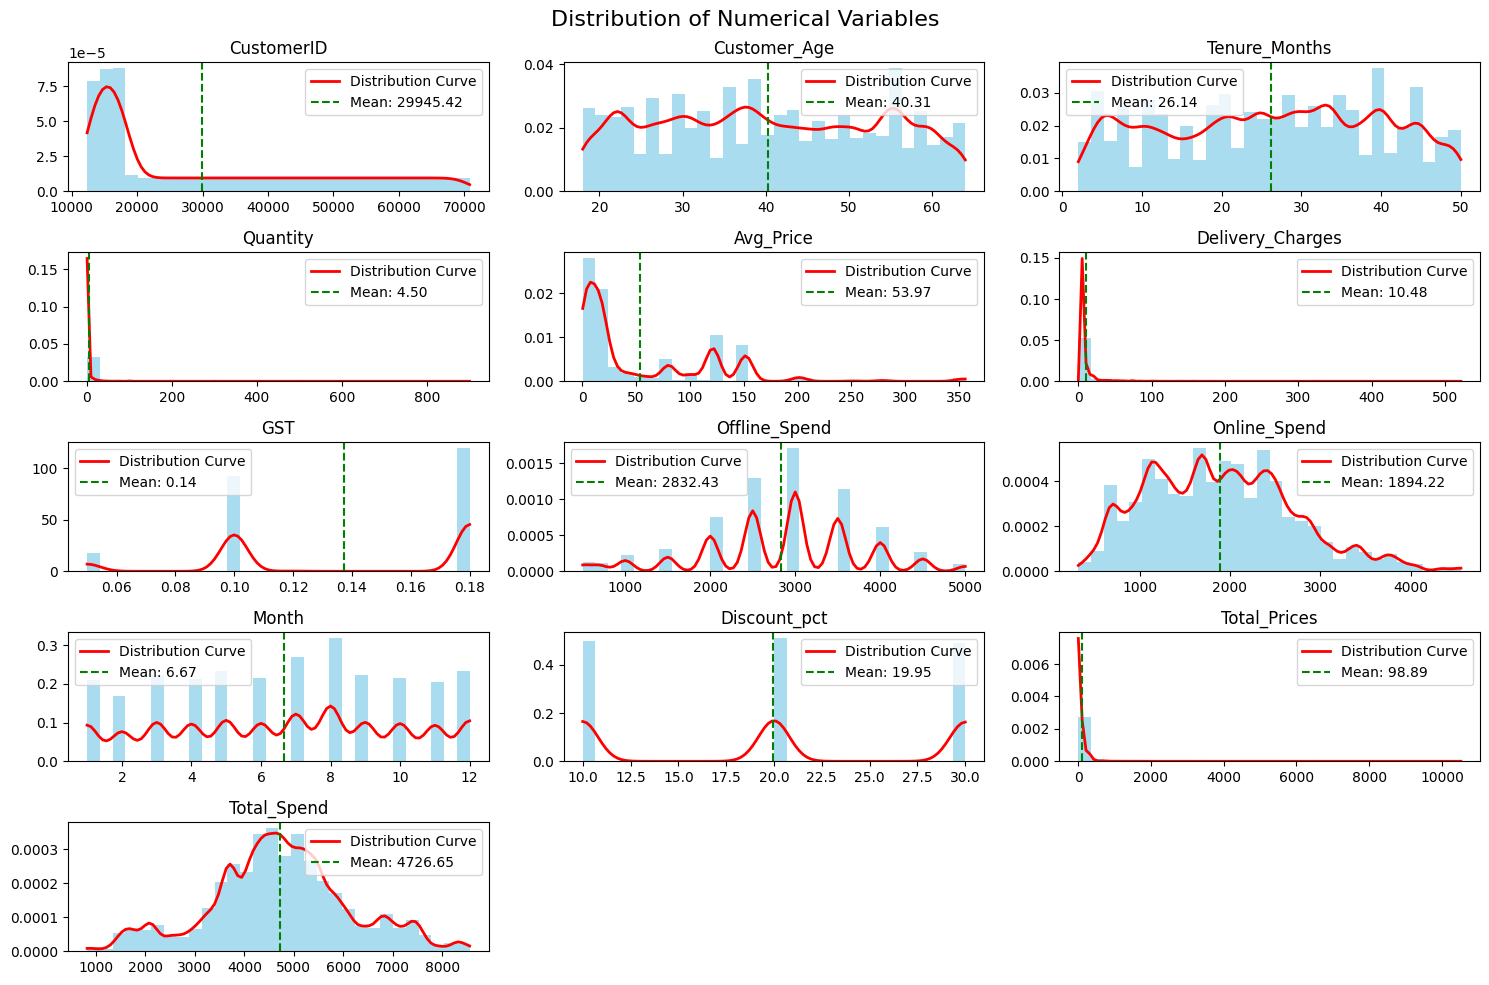

In [65]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_cols]

n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols/3))

fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)
    
    plt.hist(numeric_data[col], bins=30, density=True, color='skyblue', 
              alpha=0.7)
    
    x_range = np.linspace(numeric_data[col].min(), numeric_data[col].max(), 100)
    
    kde = stats.gaussian_kde(numeric_data[col].dropna())
    plt.plot(x_range, kde(x_range), 'r-', lw=2, label='Distribution Curve')
    
    mean_val = numeric_data[col].mean()
    plt.axvline(x=mean_val, color='green', linestyle='--', 
                label=f'Mean: {mean_val:.2f}')
    
    plt.title(col)
    plt.legend()

plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Customer ID')

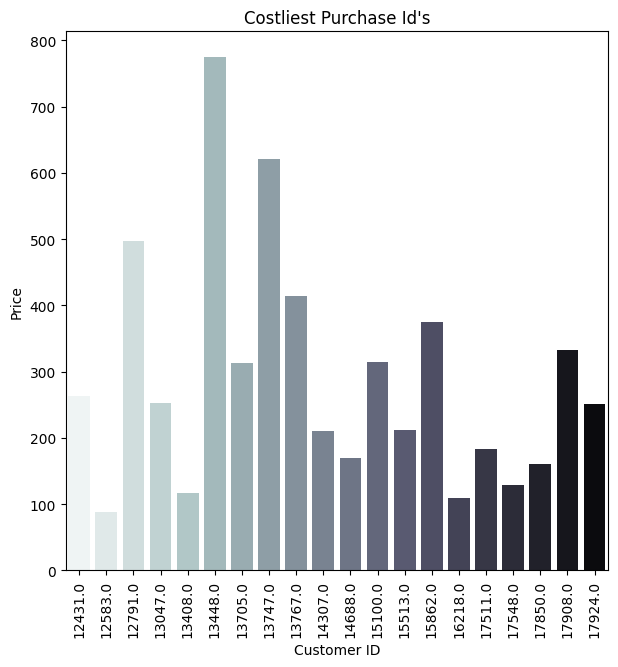

In [66]:
val1=df[['CustomerID','Total_Prices']]
x=val1['CustomerID'].unique()[:20]
y=val1['Total_Prices'].unique()[:20]
fig,axis=plt.subplots(figsize=(7,7))

val1=val1.sort_values(by='Total_Prices',ascending=False)
sb.barplot(x=x,y=y,palette='bone_r',ax=axis)
plt.xticks(rotation=90)
plt.title("Costliest Purchase Id's")
plt.ylabel('Price')
plt.xlabel('Customer ID')

## Top 30 Popular Customer

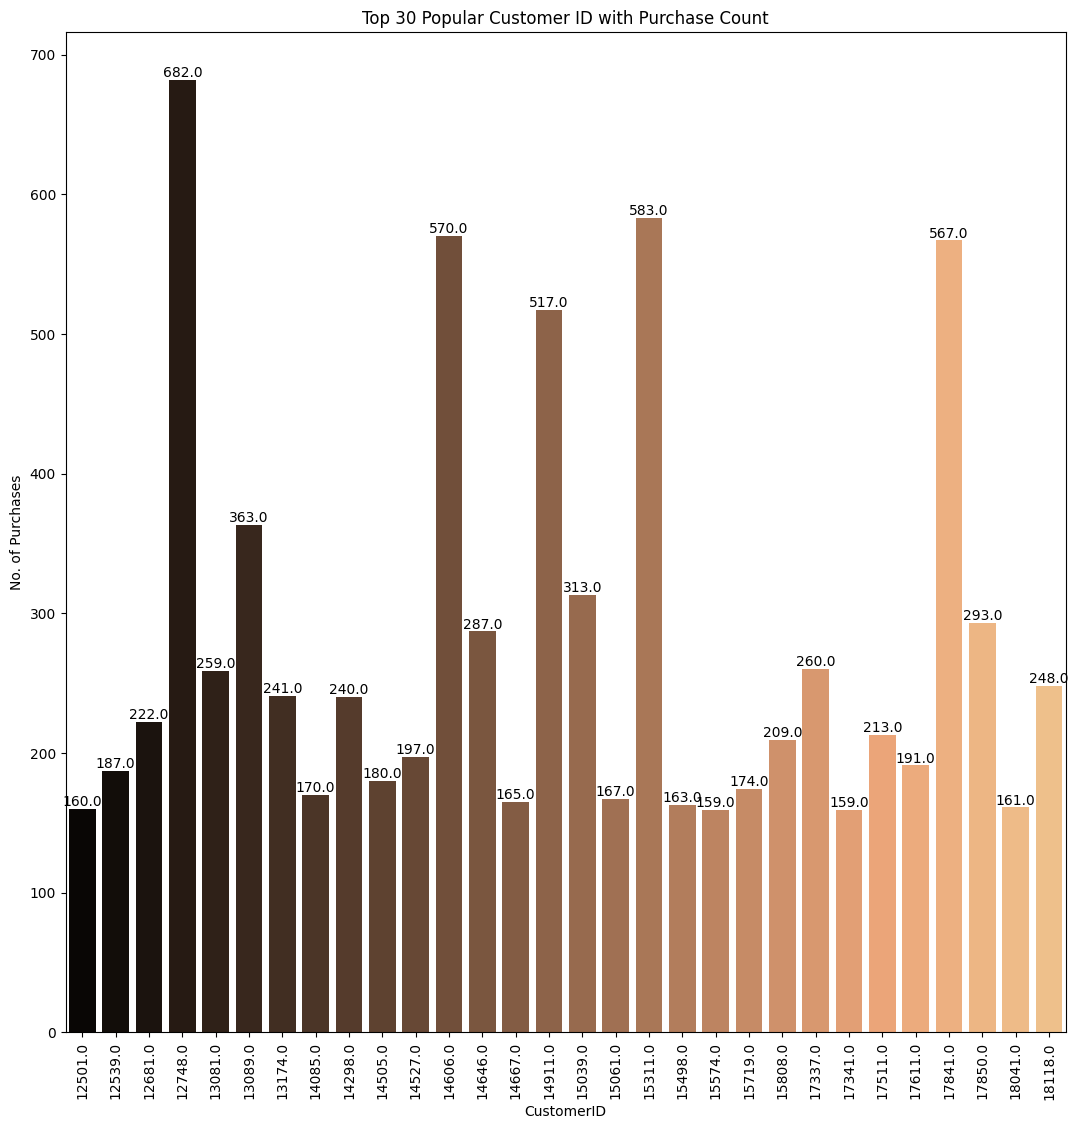

In [67]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
val2=df['CustomerID'].value_counts().sort_values(ascending=False).head(30)
sb.barplot(x=val2.index,y=val2,palette='copper',ax=axis)

plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.title('Top 30 Popular Customer ID with Purchase Count')
for i in axis.patches:
    axis.annotate(
        f'{i.get_height()}',
        (i.get_x() + i.get_width() / 2, i.get_height() + 5),
        ha='center', va='center',
        color='black', fontsize=10
        )

In [68]:
from matplotlib import cm
c1=cm.get_cmap('Accent')
c2=cm.get_cmap('twilight')

## Male - Female Purchase

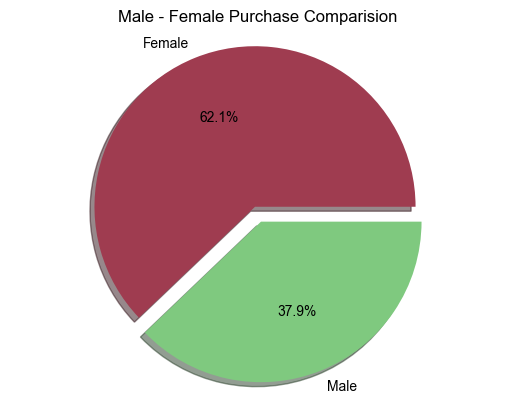

In [69]:
val3=df['Gender'].value_counts()
plt.pie(val3,labels=['Female','Male'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),colors=[c2(0.7),c1(0.1)])
plt.axis('equal')
plt.title('Male - Female Purchase Comparision')
sb.set(style='white')

## Tenure Months Frequency Of Customers

Text(0.5, 1.0, 'Tenure Months Frequency of Customers')

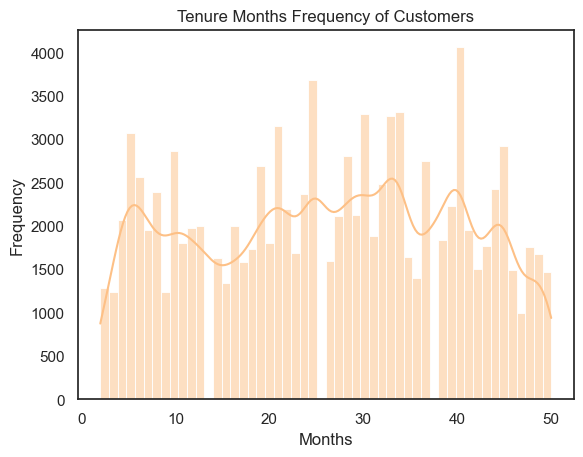

In [70]:
val4=df['Tenure_Months']
sb.histplot(val4,kde=True,color=c1(0.3))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Tenure Months Frequency of Customers')

## Product Category Frequency Analysis

Text(44.25, 0.5, 'Percentages')

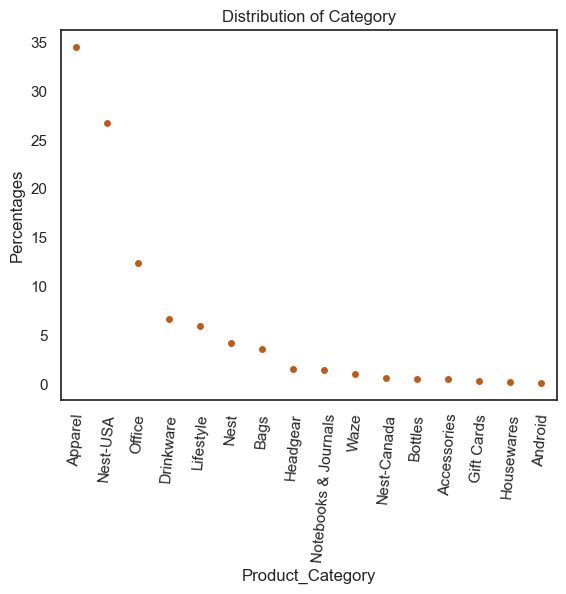

In [71]:
freqdata=df['Product_Category'].value_counts()
total=freqdata.sum()
percent=(freqdata.values/total)*100
sb.swarmplot(x=freqdata.index,y=percent,color=c1(0.8))
plt.xticks(rotation=85)
plt.title('Distribution of Category')
plt.ylabel('Percentages')

## Heatmap For Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

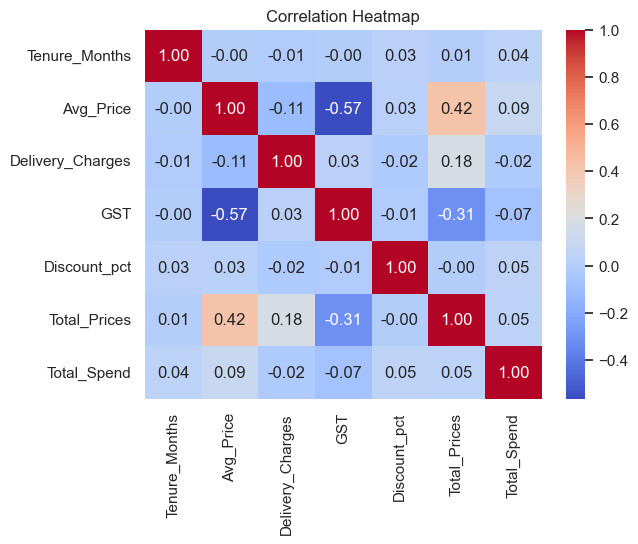

In [72]:
x = make_column_selector(dtype_include=np.number)
newdf = df[x(df)]
newdf = newdf[['Tenure_Months','Avg_Price', 'Delivery_Charges', 'GST', 'Discount_pct', 'Total_Prices', 'Total_Spend']]
sb.heatmap(newdf.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

## Location Frequency

Text(0, 0.5, 'Frequency')

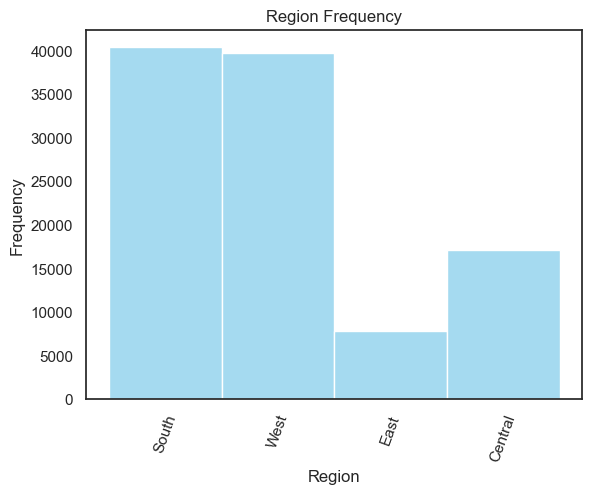

In [73]:
sb.histplot(df['Region'], color='skyblue')
plt.xticks(rotation=70)
plt.title('Region Frequency')
plt.xlabel('Region')
plt.ylabel('Frequency')

## Coupon Status Frequency

Text(0, 0.5, 'Count')

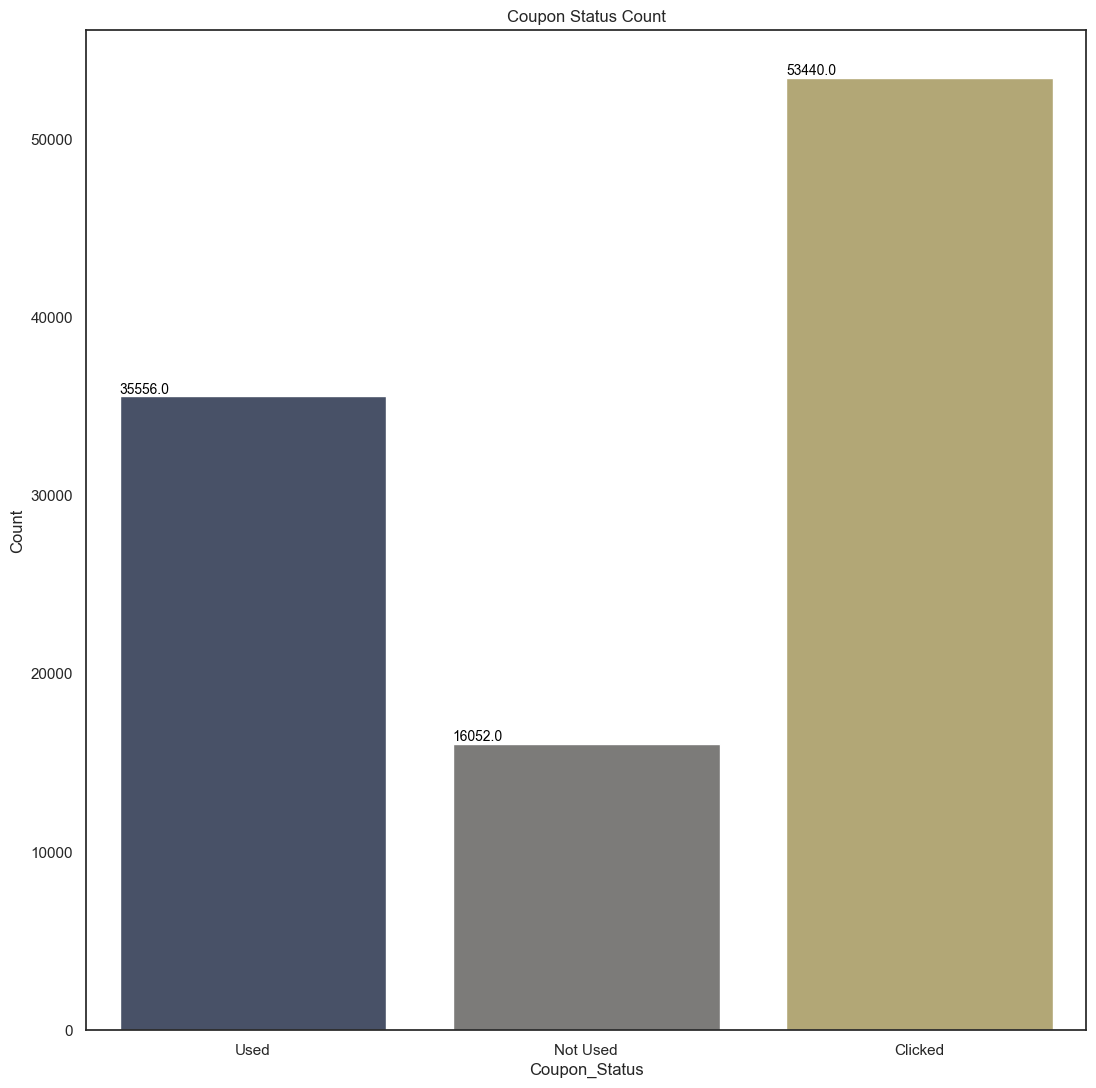

In [74]:
fig = plt.figure(figsize=(10, 10))
axis1 = fig.add_axes([1,1,1,1])
sb.countplot(data=df['Coupon_Status'], x=df['Coupon_Status'], palette='cividis', ax=axis1)
for i in axis1.patches:
    axis1.annotate(
        f'{i.get_height()}',
        (i.get_x(), i.get_height()),
        ha='left', va='bottom',
        color='black', fontsize=10
        )
plt.title('Coupon Status Count')
plt.ylabel('Count')

## Delivery Charges and Avg Price

Text(0.5, 1.0, 'Delivery Charges vs Avg Price')

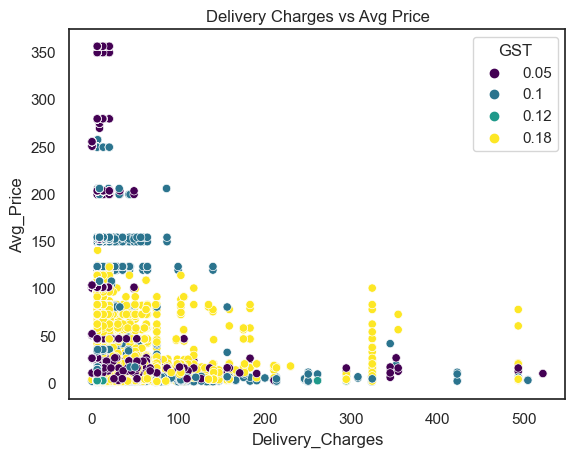

In [75]:
sb.scatterplot(data=df, x='Delivery_Charges', y='Avg_Price', hue='GST', palette='viridis')
plt.title('Delivery Charges vs Avg Price')

## Time Analysis

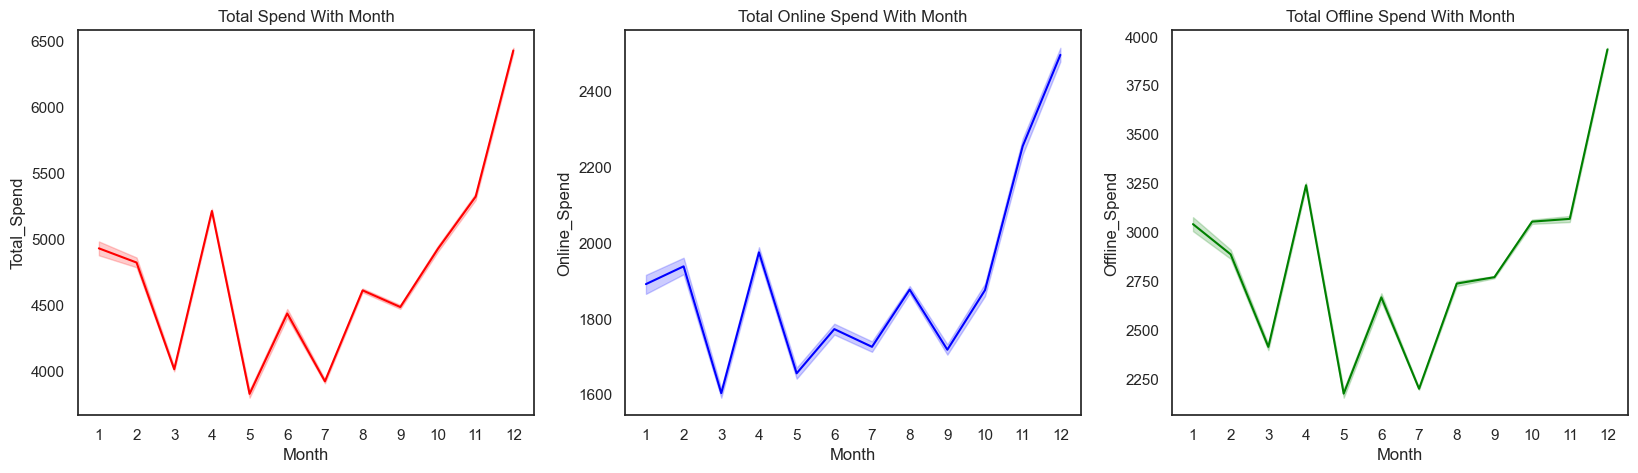

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Lấy ra 12 tháng bằng chữ
sb.lineplot(data=df, x='Month', y='Total_Spend', color='red', ax=axs[0]).set_title('Total Spend With Month')
axs[0].set_xticks(np.arange(1, 13))
sb.lineplot(data=df, x='Month', y='Online_Spend', color='blue', ax=axs[1]).set_title('Total Online Spend With Month')
axs[1].set_xticks(np.arange(1, 13))
sb.lineplot(data=df, x='Month', y='Offline_Spend', color='green', ax=axs[2]).set_title('Total Offline Spend With Month')
axs[2].set_xticks(np.arange(1, 13))